<a href="https://colab.research.google.com/github/CristianCosci/LAB_MachineLearning_course/blob/main/Clustering_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

from sklearn.cluster import KMeans #documentation https://scikit-learn.org/stable/modules/clustering.html#
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
plt.rcParams["figure.figsize"] = (10,7)

In [55]:
dset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dummy_dataset_clustering.csv", sep=";")
dset.head()

,Feature1-bis,Feature2-bis
0,-2.549591,2.564382
1,6.919673,-7.684989
2,6.595795,-11.060815
3,3.777644,-3.560102
4,5.478495,-5.704121


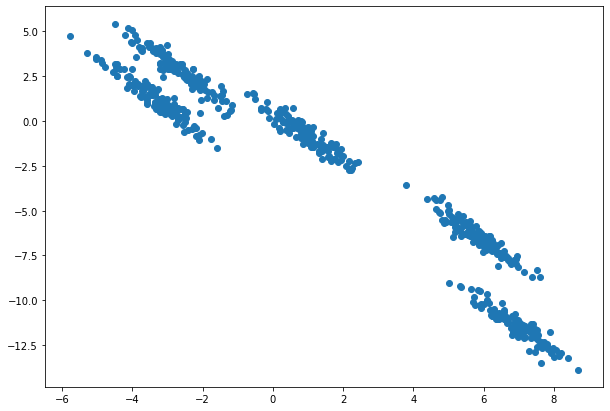

In [56]:
plt.scatter(dset.iloc[:,0], dset.iloc[:,1]) # To see point of dataset in a cartesian plane

In [57]:
# create Kmeans and fit https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# Creazione classica
kmeans = KMeans(n_clusters=5, random_state=42).fit(dset)

# Altro modo
dset_array = dset.to_numpy() # Si può anche fare trasformando il dataset da dataframe a numpy array (ho notato che in realtà non cambia niente)
kmeans2 = KMeans(n_clusters=5, random_state=42).fit(dset_array)

In [96]:
# Funzione di comodo per inizializzazione più rapida
def build_kmeans(n_cluster, data, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 21):
  kmeans = KMeans(n_cluster, init = init, n_init = n_init, max_iter = max_iter, random_state = random_state).fit(data)
  return kmeans

In [59]:
kmeans3 = build_kmeans(3, dset)
kmeans3.cluster_centers_

array([[ 1.02564028, -0.94927023],
       [ 6.38680697, -8.95894815],
       [-2.98591713,  2.04961159]])

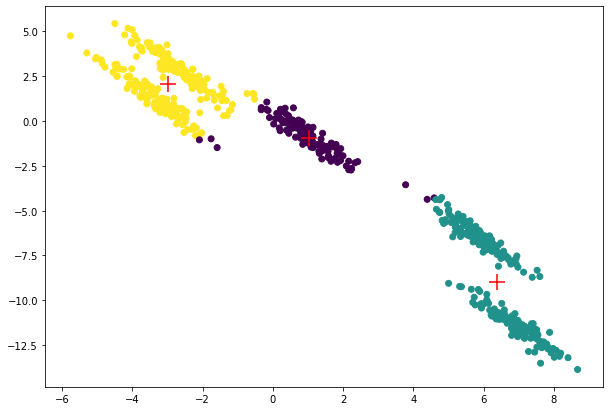

In [60]:
# Model info visualization
plt.scatter(dset.iloc[:,0], dset.iloc[:, 1], c = kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:, 1], marker = "+", s = 250, c = "red")

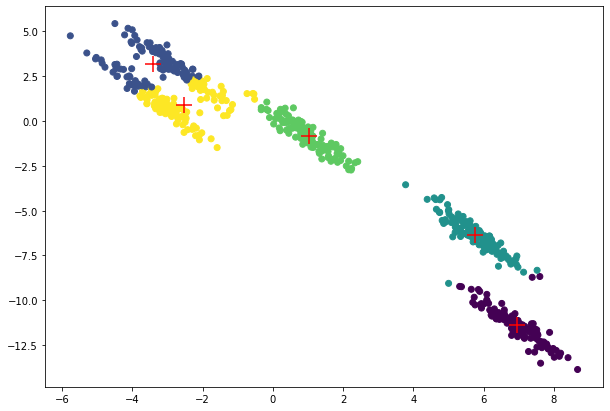

In [61]:
# Try with 5 clusters
kmeans5 = build_kmeans(5, dset)
plt.scatter(dset.iloc[:,0], dset.iloc[:, 1], c = kmeans5.labels_)
plt.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:, 1], marker = "+", s = 250, c = "red")

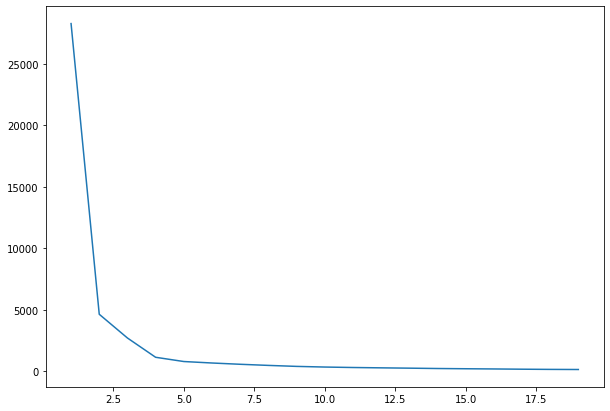

In [62]:
#elbow method: useful to find the best k with respect SSE (also called inertia) 
error = []
for i in range(1, 20):
  kmeans = build_kmeans(i, dset)
  error.append(kmeans.inertia_)

plt.plot(range(1, 20), error)

In [65]:
min_value = min(error)

# Find the minimum value of error (number of cluster which permit to obtain minimum SSE)
min_index = error.index(min_value)
min_index

18

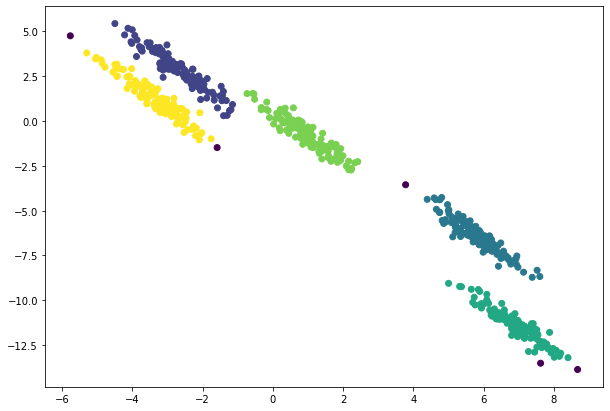

In [73]:
# Try to resolve the problem with DBSCAN https://scikit-learn.org/stable/modules/clustering.html#dbscan
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.5, min_samples = 3).fit(dset)
plt.scatter(dset.iloc[:,0], dset.iloc[:, 1], c = dbscan.labels_)

In [83]:
dset2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/blob_data2D_v3.csv", sep=",")
dset2.head()

,Unnamed: 0,0,1
0,0,0.087641,7.401581
1,1,0.679869,6.417878
2,2,-3.167493,9.003850
3,3,3.570883,-2.653292
4,4,2.712693,-0.731479


In [87]:
dset2.drop('Unnamed: 0', inplace = True, axis = 1) # Remove the firt column

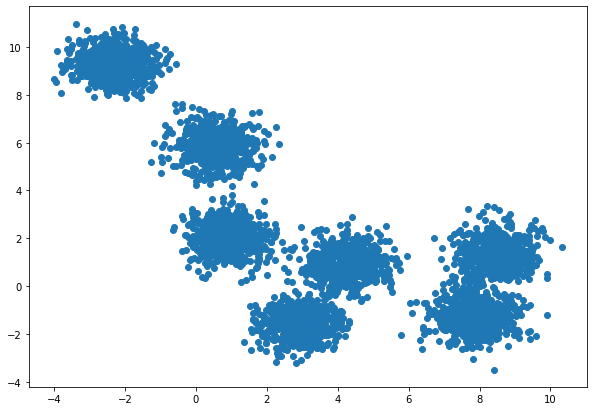

In [89]:
plt.scatter(dset2.iloc[:,0], dset2.iloc[:,1]) # To see point of dataset in a cartesian plane

In [91]:
kmeans = build_kmeans(7, dset2)
kmeans.cluster_centers_

array([[ 0.91871011,  2.02229847],
       [-2.32402986,  9.27455262],
       [ 8.48537026,  1.36983152],
       [ 0.57207484,  5.85119111],
       [ 4.27204615,  0.94642273],
       [ 2.90036054, -1.59495787],
       [ 7.83922511, -1.23999527]])

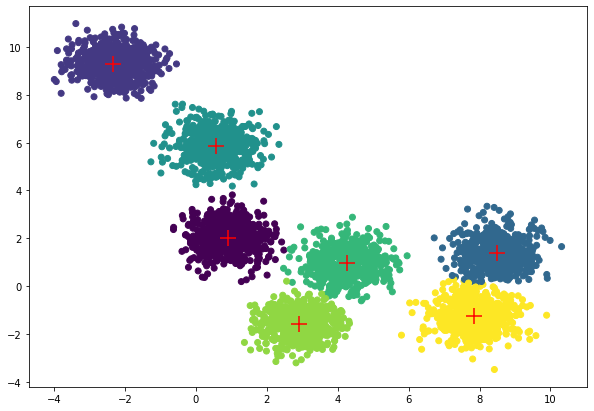

In [92]:
# Model info visualization
plt.scatter(dset2.iloc[:,0], dset2.iloc[:, 1], c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], marker = "+", s = 250, c = "red")

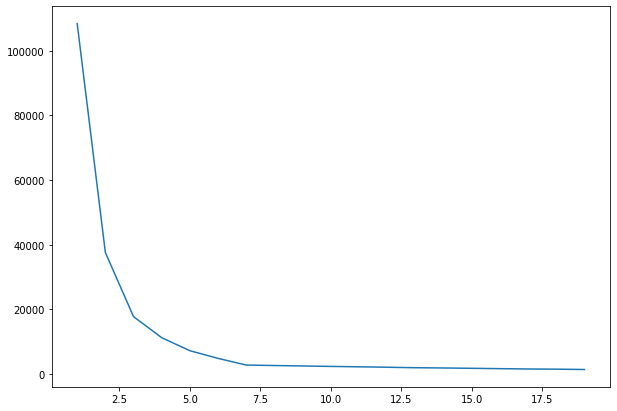

In [93]:
#elbow method: useful to find the best k with respect SSE (also called inertia) 
error = []
for i in range(1, 20):
  kmeans = build_kmeans(i, dset2)
  error.append(kmeans.inertia_)

plt.plot(range(1, 20), error)

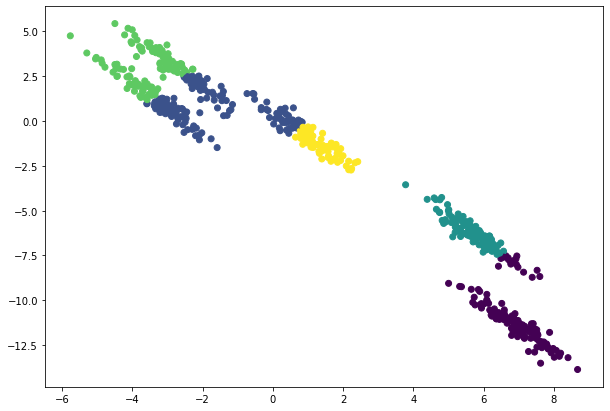

In [100]:
# Try to resolve the problem with AgglomerativeClustering¶ https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters = 5, linkage = "complete")
y_agglom = agglom.fit_predict(dset)
plt.scatter(dset.iloc[:,0], dset.iloc[:, 1], c = y_agglom)

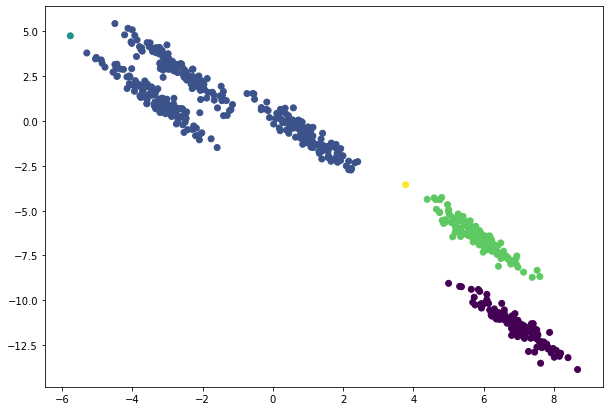

In [101]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = "single")
y_agglom = agglom.fit_predict(dset)
plt.scatter(dset.iloc[:,0], dset.iloc[:, 1], c = y_agglom)

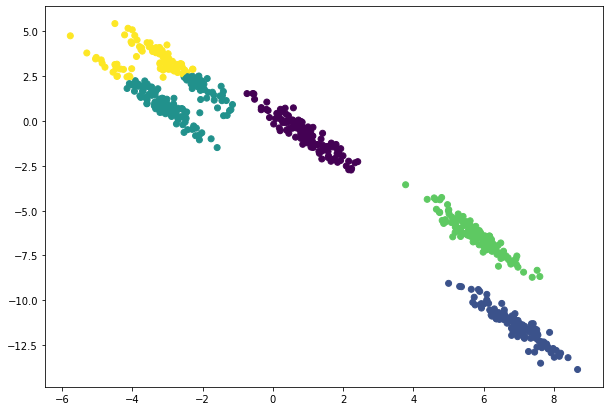

In [102]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = "ward")
y_agglom = agglom.fit_predict(dset)
plt.scatter(dset.iloc[:,0], dset.iloc[:, 1], c = y_agglom)

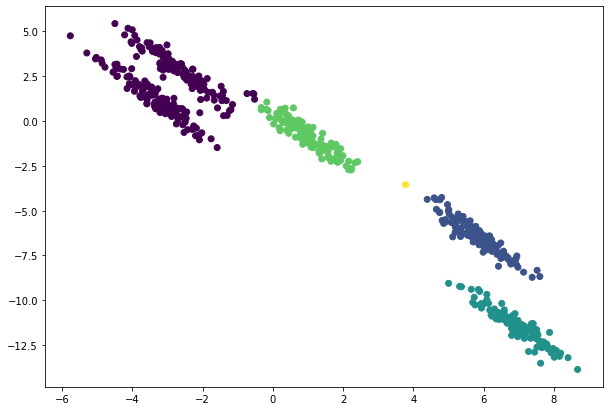

In [103]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = "average")
y_agglom = agglom.fit_predict(dset)
plt.scatter(dset.iloc[:,0], dset.iloc[:, 1], c = y_agglom)

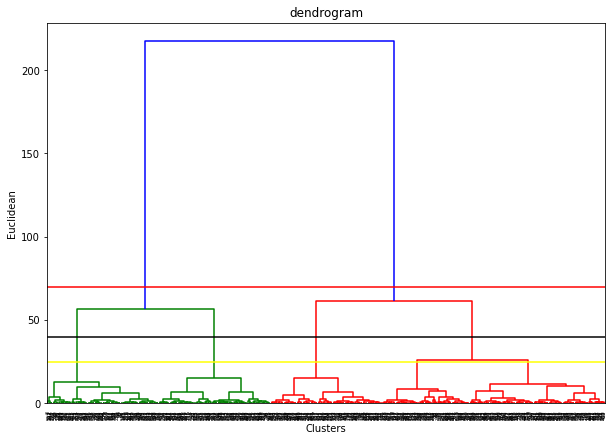

In [104]:
#Aglomerative clustering with scipy in order to visualize the dendogram

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram
import scipy.cluster.hierarchy as sch

d = sch.dendrogram (sch.linkage(dset, method = "ward"))
plt.title("dendrogram")
plt.xlabel("Clusters")
plt.ylabel("Euclidean")
plt.axhline(y = 70, color = "r", linestyle = "-")
plt.axhline(y = 40, color = "black", linestyle = "-")
plt.axhline(y = 25, color = "yellow", linestyle = "-")
plt.show()


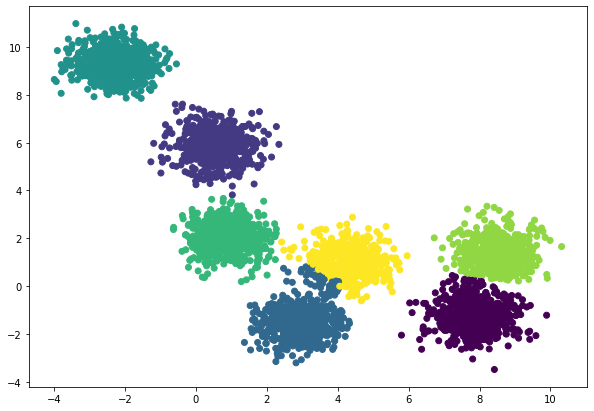

In [107]:
# agglomerative with complete linkage for dset2
agglom = AgglomerativeClustering(n_clusters = 7, linkage = "complete")
y_agglom = agglom.fit_predict(dset2)
plt.scatter(dset2.iloc[:,0], dset2.iloc[:, 1], c = y_agglom)

In [ ]:
# TODO
# Evaluate the clustering with label

Because K-maens knows nothing about the identity of the cluster, the 0-2 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

Now we can check how accurate our unsupervised clustering was in finding similar samples withing the data